In [4]:
import psycopg2

try:
    conn = psycopg2.connect("dbname='shakespeare' user='evelynting' host='localhost' password='password'")
except:
    print("couldn't connect to db")
cursor = conn.cursor()

In [5]:
def createMassiveArray():
    sqlString = "SELECT words FROM plays;"
    cursor.execute(sqlString)
    res = cursor.fetchall()
    
    for entry in res:
        print (entry[0])

In [6]:
import os
def listOfSceneWords(dir_name, plays):
    sceneWords = list()
    for play_name in plays:
        play_dir = dir_name + '/' + play_name
        scenes = [f for f in os.listdir(play_dir)]
        for scene in scenes:
            with open(play_dir + '/' + scene) as file:
                text = file.read().lower()
                sceneWords.append(text)
    return sceneWords

In [7]:
dir_name = "/Users/evelynting/Desktop/thesis/cleanPlays"
cleanPlays = [f for f in os.listdir(dir_name) ]
clean_train_shakespeare = list()
clean_train_shakespeare += listOfSceneWords(dir_name, cleanPlays)

In [8]:
print ("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 100) 

train_data_features = vectorizer.fit_transform(clean_train_shakespeare)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data = train_data_features.toarray()

print (len(train_data[0]))
train_data

Creating the bag of words...

100


array([[12,  6, 12, ...,  2, 61, 18],
       [ 0,  0,  1, ...,  1,  9,  3],
       [ 3,  7,  1, ...,  0, 13,  6],
       ..., 
       [ 1,  0,  0, ...,  0,  2,  1],
       [ 0,  0,  0, ...,  0,  2,  1],
       [ 7, 11,  2, ...,  4, 40, 14]], dtype=int64)

In [5]:
from sklearn import cluster

k = 2
kmeans = cluster.KMeans(n_clusters= k)
kmeans.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

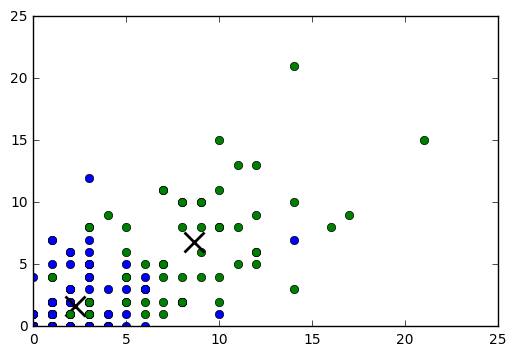

In [7]:
from matplotlib import pyplot
import numpy as np

for i in range(k):
    # select only data observations with cluster label == i
    ds = train_data[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()